In [2]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

import gridworld, sarsa, q_learning
gridworld = importlib.reload(gridworld)
sarsa = importlib.reload(sarsa)
q_learning = importlib.reload(q_learning)
GridWorld = gridworld.GridWorld
Sarsa = sarsa.Sarsa
Q_Learning = q_learning.Q_Learning
import policy_gradient 
import reinforce
policy_gradient = importlib.reload(policy_gradient)
reinforce = importlib.reload(reinforce)

Policy = policy_gradient.Policy
Reinforce = reinforce.Reinforce
import seaborn as sns

# Sarsa

In [3]:
sarsa_easy = Sarsa(GridWorld(is_hard=False))
sarsa_hard = Sarsa(GridWorld(is_hard=True))

In [4]:
sarsa_easy_rewards = sarsa_easy.train(num_episodes=2000, epsilon=1, decay=0.01)

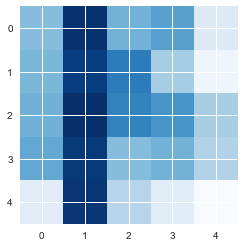

In [6]:
plt.imshow(sarsa_easy.Q.sum(-1).reshape((5,5)), cmap="Blues")

In [7]:
sarsa_hard_rewards = sarsa_hard.train(num_episodes=2000, epsilon=1, decay=0.01)

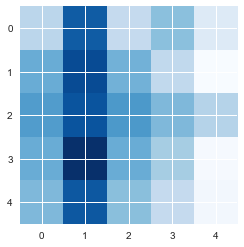

In [8]:
plt.imshow(sarsa_hard.Q.sum(-1).reshape((5,5)), cmap="Blues")

Q Learning

In [9]:
Q_easy = Q_Learning(GridWorld(is_hard=False))
Q_hard = Q_Learning(GridWorld(is_hard=True))

In [10]:
Q_easy_rewards = Q_easy.train(num_episodes=2000, epsilon=1, decay=0.01)

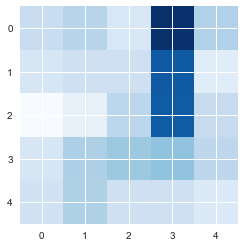

In [11]:
plt.imshow(Q_easy.Q.sum(-1).reshape((5,5)), cmap="Blues")

In [12]:
Q_hard_rewards = Q_hard.train(num_episodes=2000, epsilon=1, decay=0.01)

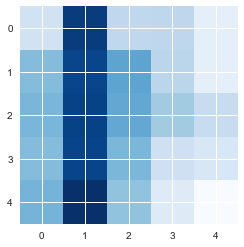

In [13]:
plt.imshow(Q_hard.Q.sum(-1).reshape((5,5)), cmap="Blues")

# REINFORCE

Using derivation of gradient from L4

In [14]:
state_space = 25
action_space = 4

## Hyperparameters for easy

Learning rate:

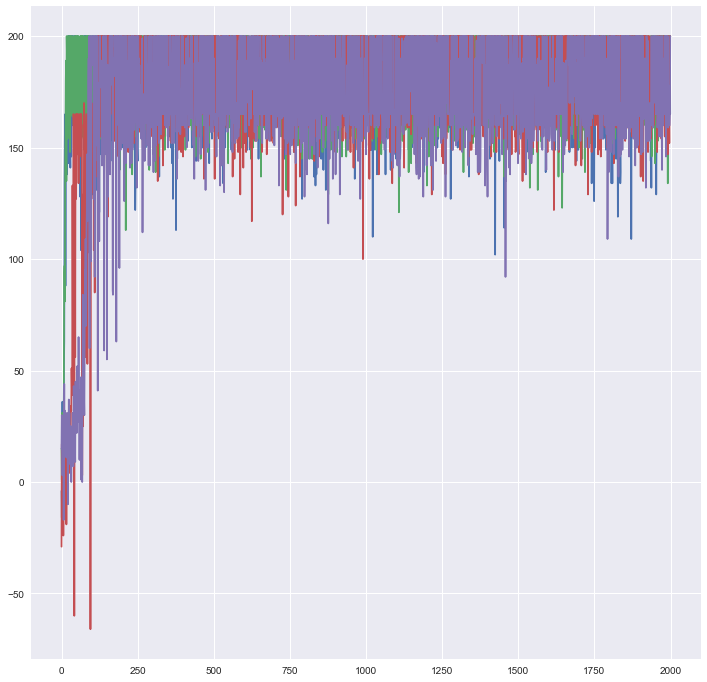

In [15]:
plt.figure(figsize=(12,12))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.2))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.1))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.05))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.01))
plt.show()

No real difference other than learning rate being too low takes too long, so we'll use 0.1

Number of trajectories: (score normalized to num_traj=5)

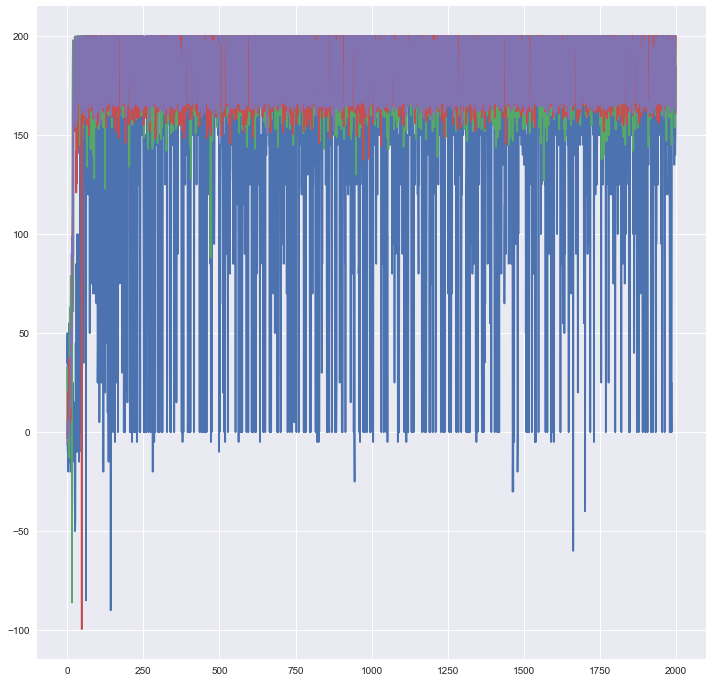

In [16]:
plt.figure(figsize=(12,12))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=1,alpha=0.1)*5)
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.1))
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=10,alpha=0.1)/2)
plt.plot(Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=20,alpha=0.1)/4)
plt.show()

No real difference, except using a single trajectory at a time makes for not nice graphs, so we'll stick with 5 since 10 and 20 take too long

## Hyperparameters for hard

Learning rate

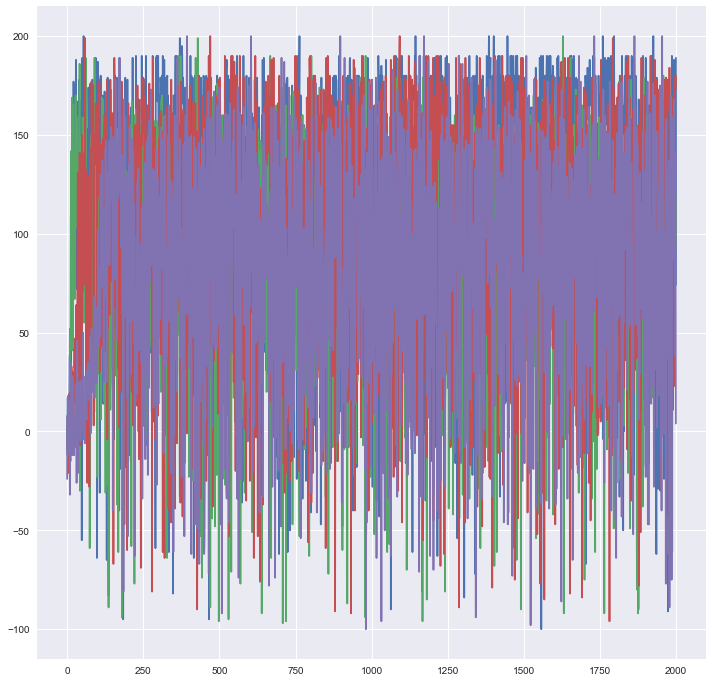

In [17]:
plt.figure(figsize=(12,12))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.2))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.1))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.05))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.01))
plt.show()

????

Number of trajectories (normalized for num_traj=5)

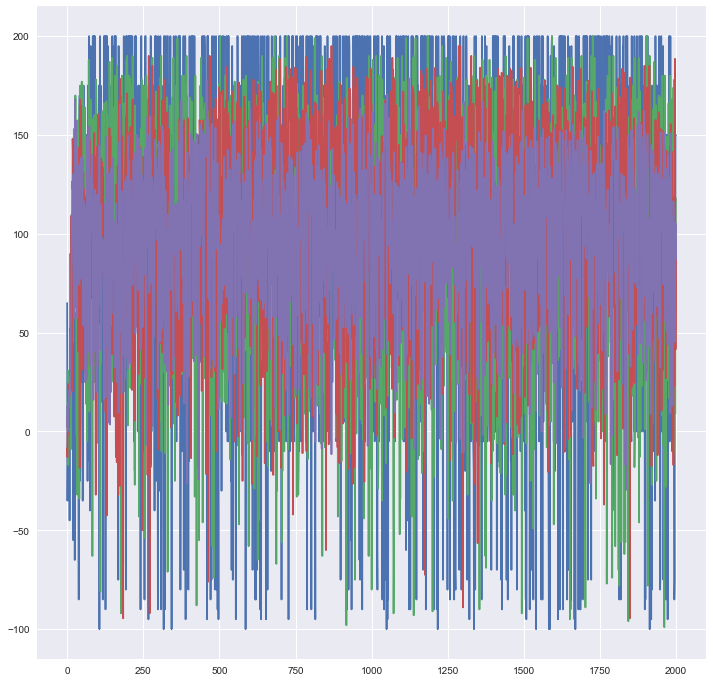

In [18]:
plt.figure(figsize=(12,12))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=1,alpha=0.1)*5)
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=5,alpha=0.1))
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=10,alpha=0.1)/2)
plt.plot(Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy()).train(episode_num=2000, traj_length=20, num_traj=20,alpha=0.1)/4)
plt.show()

???

Doesn't seem like hyperparameters have much effect. Either I have a bug in my code, or the stochastic nature of hard gridworld means the reinforce algorithm learns the wrong thing.

In [19]:
pg_easy = Reinforce(GridWorld(is_hard=False),state_space,action_space,Policy())
pg_hard = Reinforce(GridWorld(is_hard=True),state_space,action_space,Policy())

In [20]:
pg_easy_rewards = pg_easy.train(episode_num=2000)

In [21]:
pg_hard_rewards = pg_hard.train(episode_num=2000)

Easy Comparison

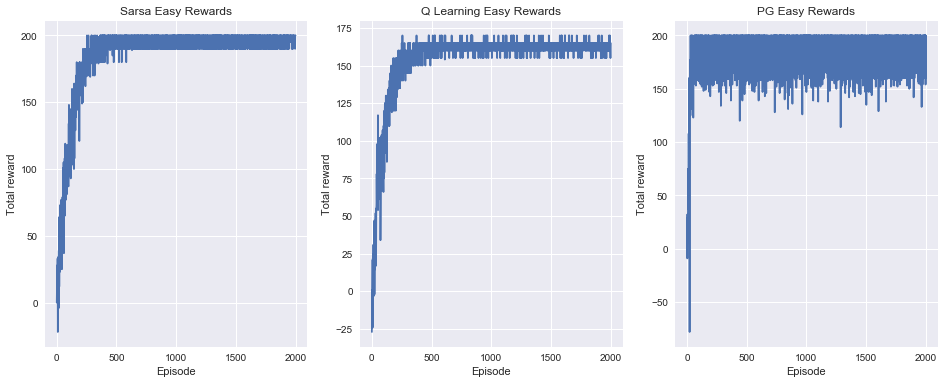

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Sarsa Easy Rewards")
plt.plot(sarsa_easy_rewards)

plt.subplot(1,3,2)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Q Learning Easy Rewards")
plt.plot(Q_easy_rewards)

plt.subplot(1,3,3)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG Easy Rewards")
plt.plot(pg_easy_rewards)

plt.show()

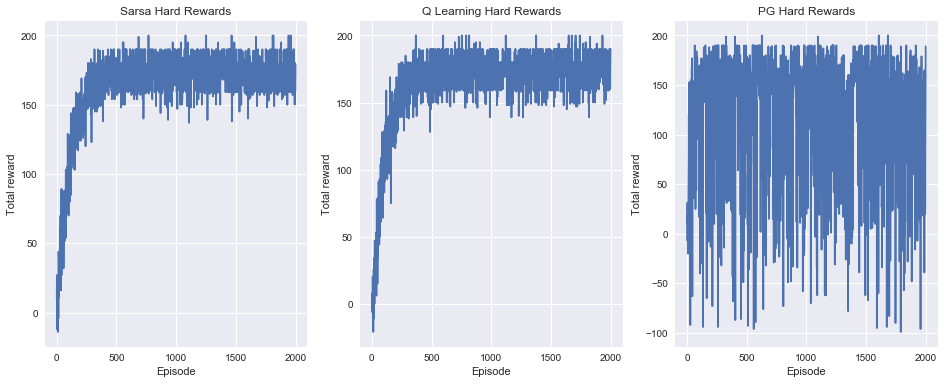

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Sarsa Hard Rewards")
plt.plot(sarsa_hard_rewards)

plt.subplot(1,3,2)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Q Learning Hard Rewards")
plt.plot(Q_hard_rewards)

plt.subplot(1,3,3)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG Hard Rewards")
plt.plot(pg_hard_rewards)

plt.show()

In [414]:
def showImagesHorizontally(list_of_images):
    fig = plt.figure(figsize=(50, 40))
    number_of_imgs = len(list_of_images)
    for i in range(number_of_imgs):
        a=fig.add_subplot(1,number_of_imgs,i+1)
        image = list_of_images[i]
        plt.imshow(image)
        plt.axis('off')

Trajectory for REINFORCE easy

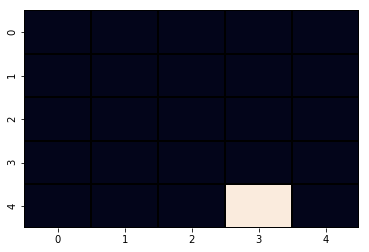

In [439]:
r, t, a, imgs = pg_easy.test(20)

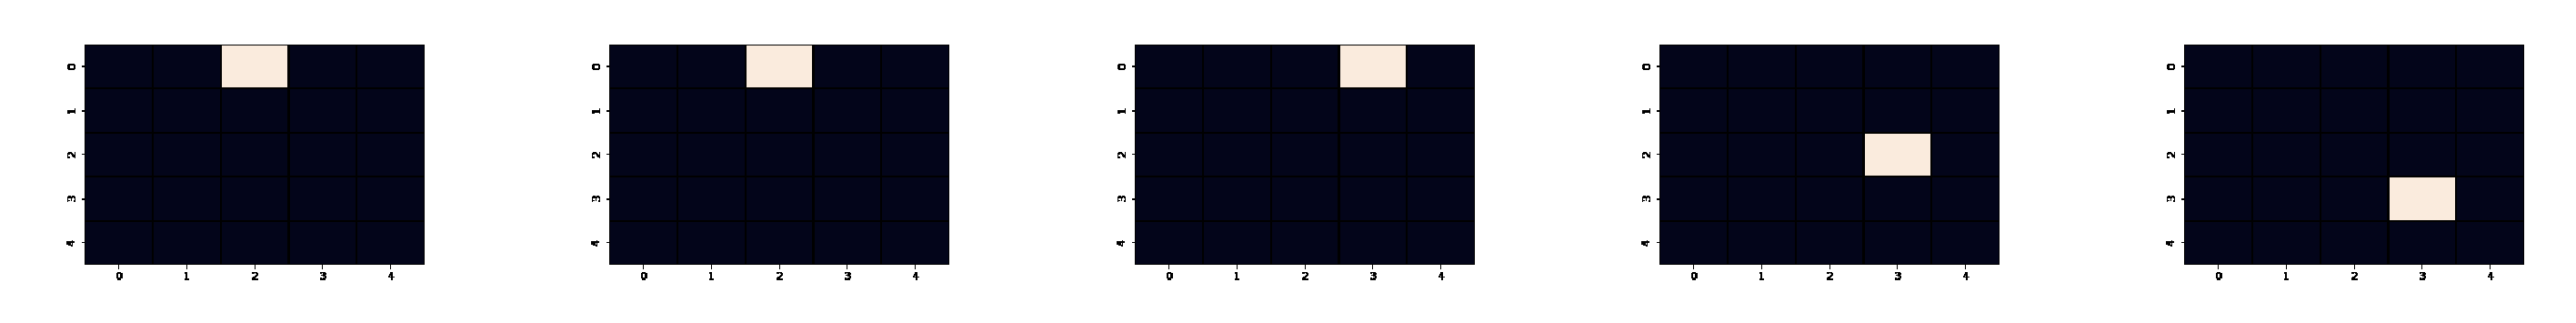

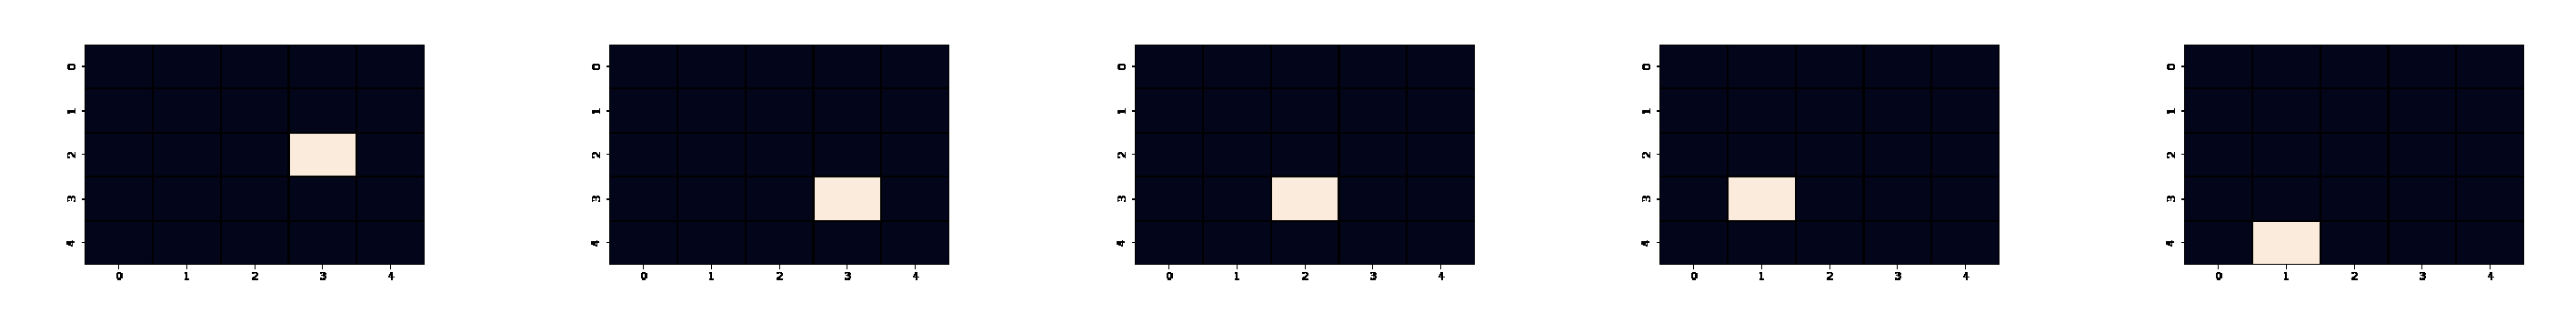

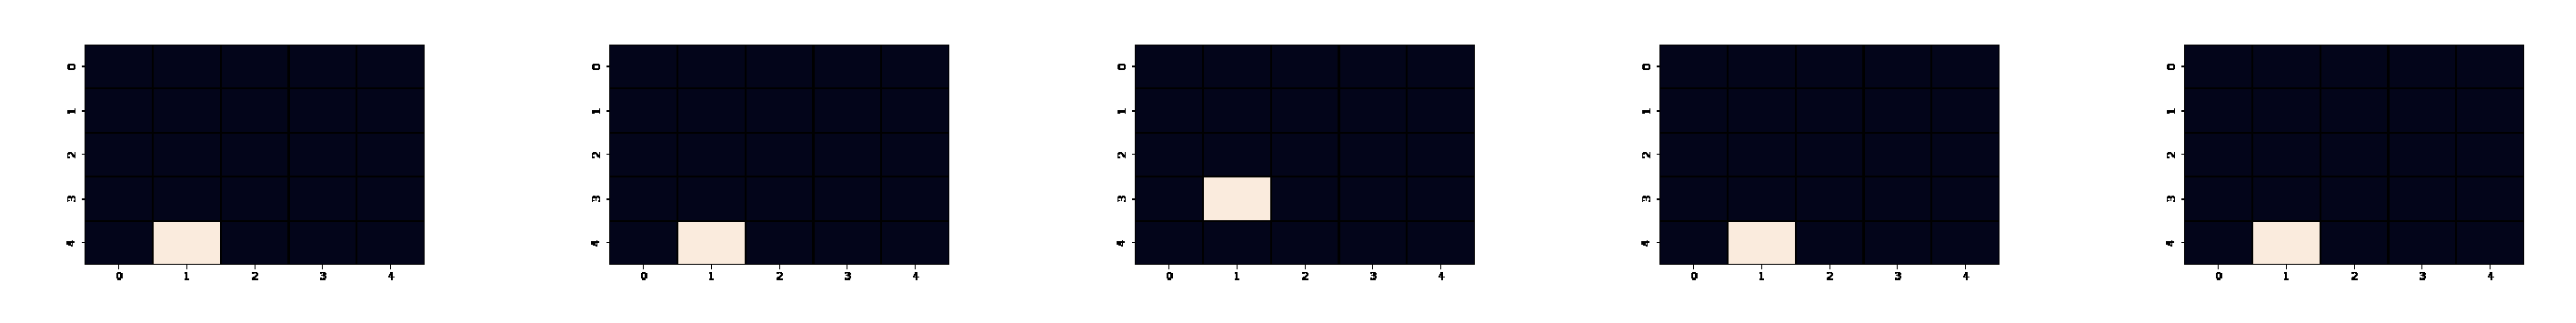

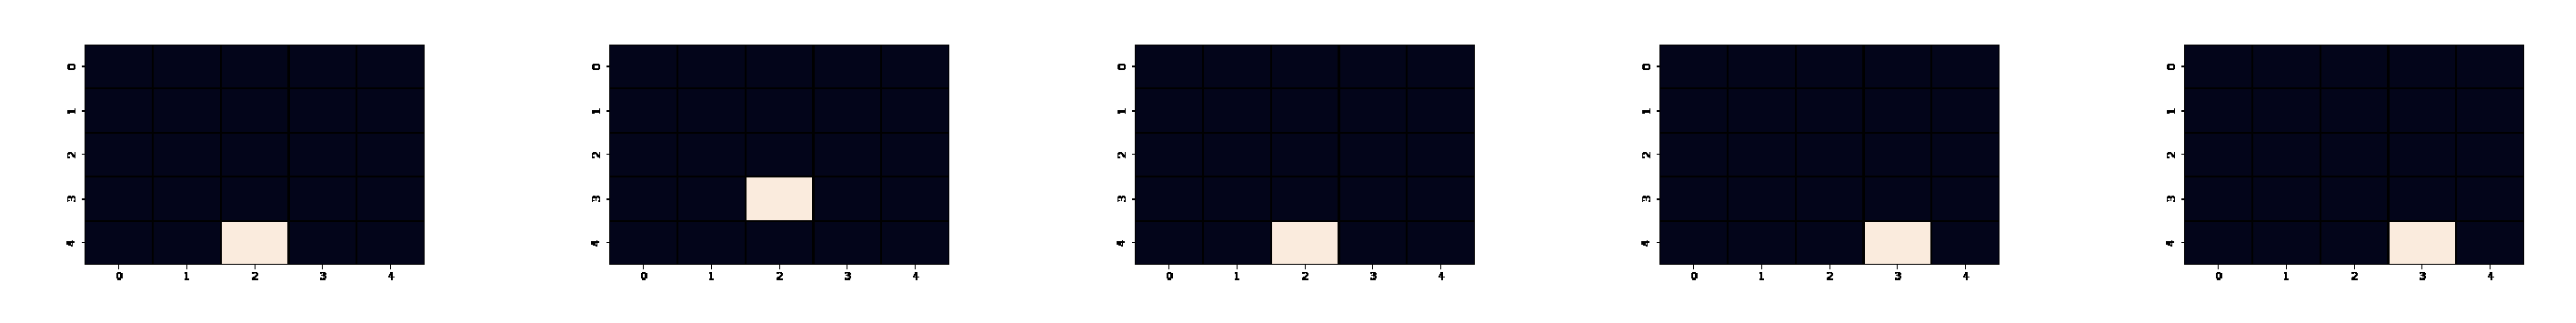

In [440]:
showImagesHorizontally(imgs[:5])
showImagesHorizontally(imgs[5:10])
showImagesHorizontally(imgs[10:15])
showImagesHorizontally(imgs[15:])

Trajectory for REINFORCE hard

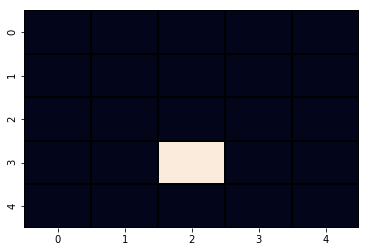

In [441]:
r, t, a, imgs = pg_hard.test(20)

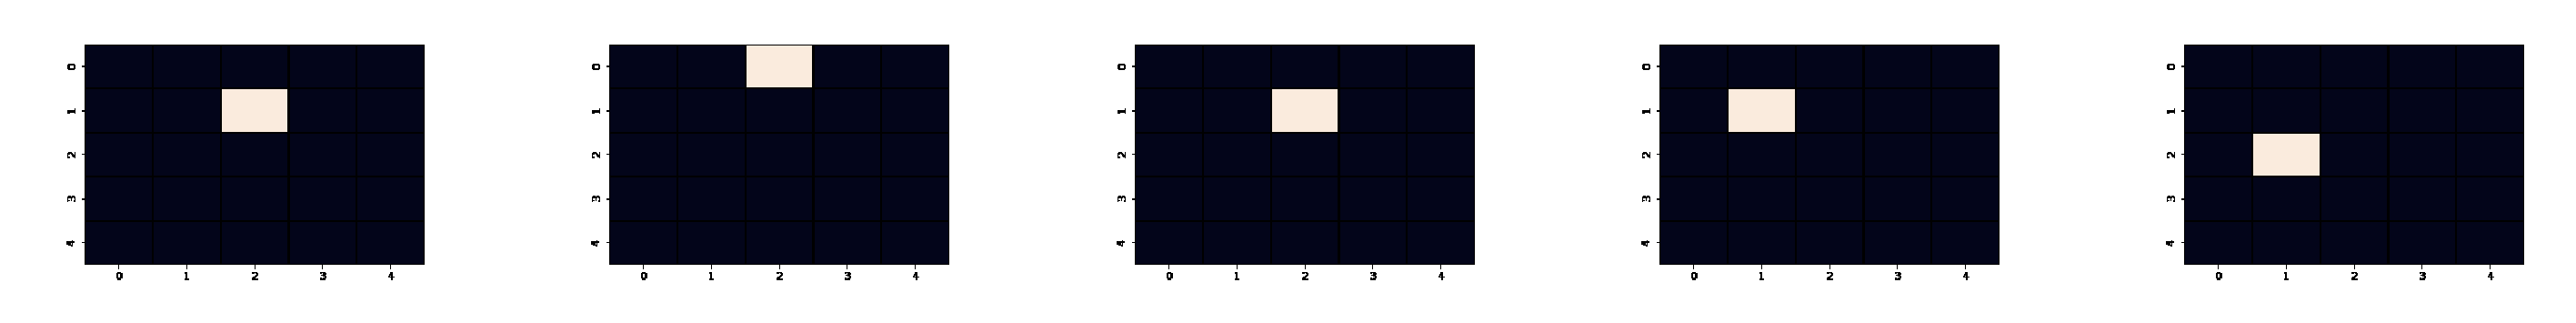

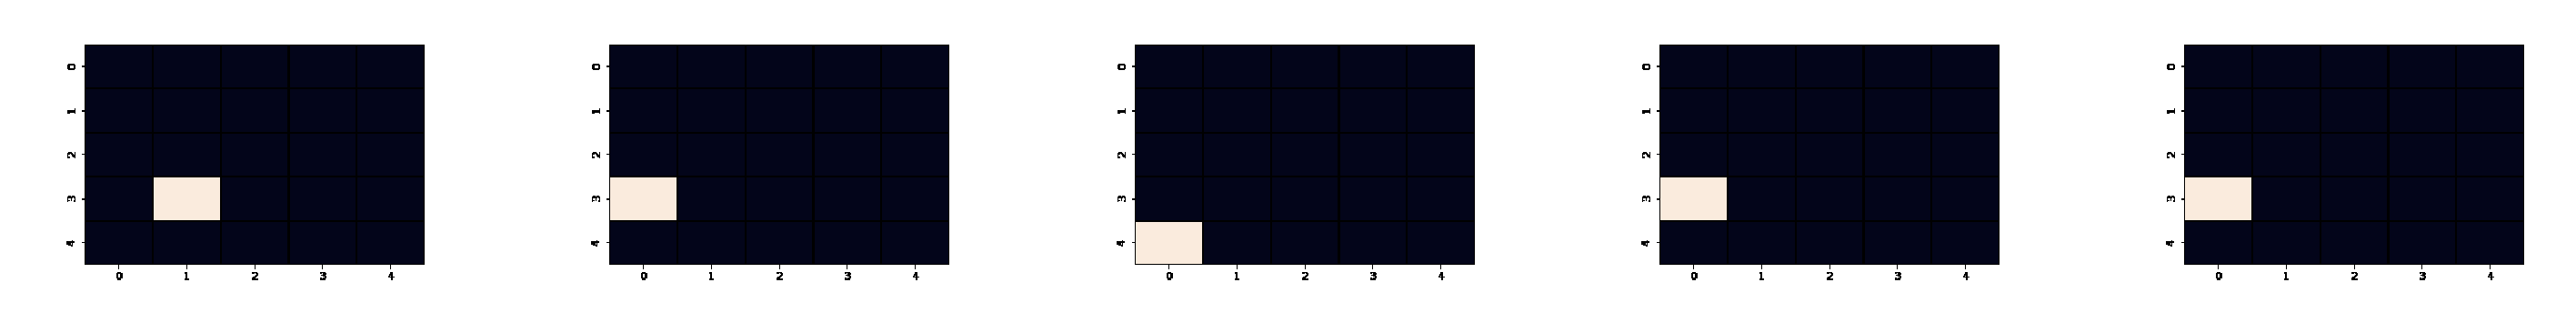

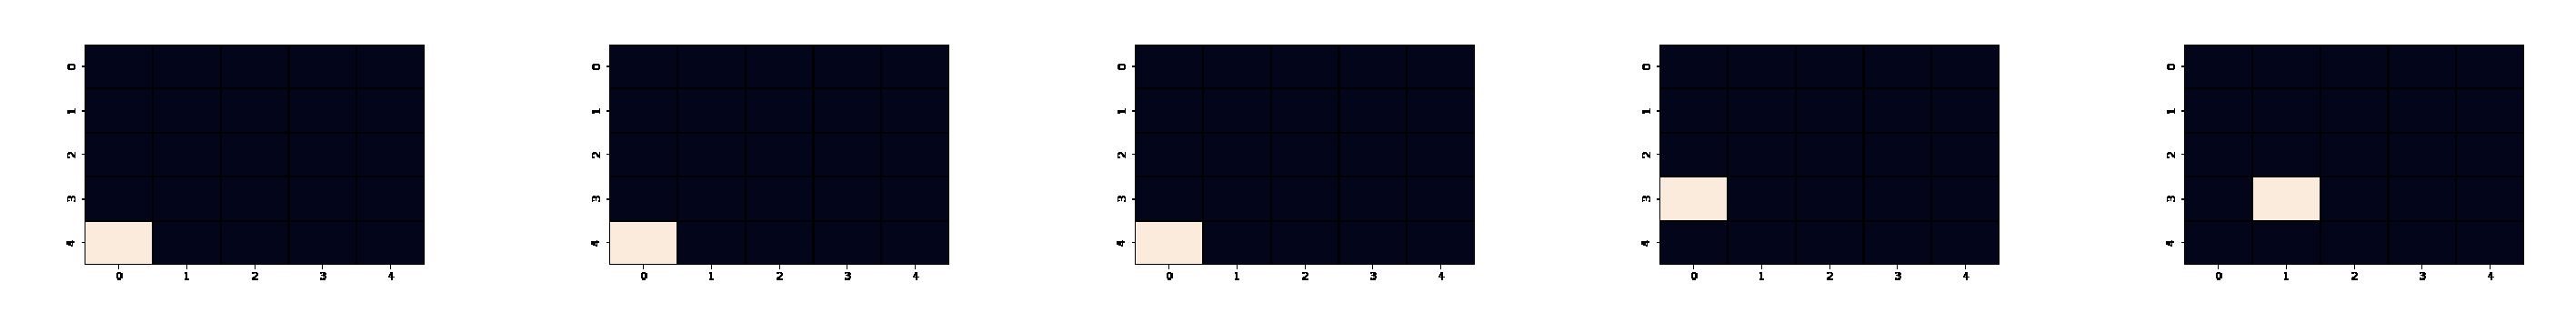

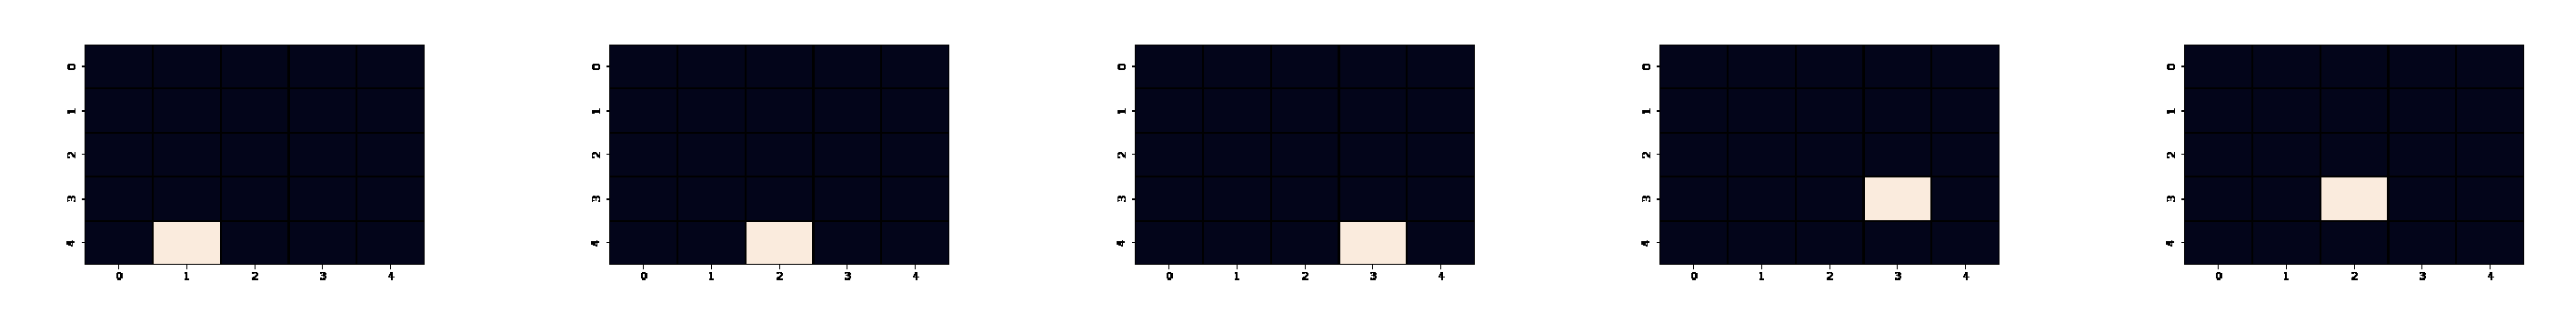

In [442]:
showImagesHorizontally(imgs[:5])
showImagesHorizontally(imgs[5:10])
showImagesHorizontally(imgs[10:15])
showImagesHorizontally(imgs[15:])